***<h1>Dataset de incêndios florestais no Brasil</h1>***

<h2>
    
    Distribuição espacial dos incêndios:

        Quais são as regiões ou estados mais afetados pelos incêndios florestais no Brasil?
        
    Distribuição temporal dos incêndios:

        Qual é o padrão de sazonalidade dos incêndios florestais? Existe um aumento nos meses de seca (como junho a setembro)?
        Houve um aumento ou diminuição no número de incêndios ao longo dos anos no Brasil?

</h2>

In [2]:
import pandas as pd;
import numpy as np;
import math as mt;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv("amazon.csv", encoding='iso-8859-1')

In [116]:
display(df)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


<h3>Alterando alguns nomes digitados incorretamente</h3>

In [118]:
df['state'] = df['state'].replace('Piau', 'Piaui')
print(df['state'].unique())

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piaui' 'Rio' 'Rondonia' 'Roraima'
 'Santa Catarina' 'Sao Paulo' 'Sergipe' 'Tocantins']


<h2>Quais são as regiões ou estados mais afetados pelos incêndios florestais no Brasil?</h2>

<h3>Filtro para retirar as linhas que não possuem focos de incêndio. Foi estipulado uma quantia de 50 focos de incêndio como parâmetro para filtrar as linhas.</h3>

In [120]:
tirar_queimadas_zero = df[df['number'] > 50]
print(tirar_queimadas_zero)
media = tirar_queimadas_zero['number'].mean()
print(media)

      year      state     month  number        date
118   2016       Acre     Junho    87.0  2016-01-01
125   2003       Acre     Julho   168.0  2003-01-01
127   2005       Acre     Julho   368.0  2005-01-01
132   2010       Acre     Julho   126.0  2010-01-01
133   2011       Acre     Julho    93.0  2011-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[2476 rows x 5 columns]
263.75726978998387


<h3>
    Selecionar os dados em que o número de queimadas é maior do que a média calculada.
</h3>

In [121]:
acima_da_media = df[df['number'] > 263]
print(acima_da_media)

      year      state     month  number        date
127   2005       Acre     Julho   368.0  2005-01-01
138   2016       Acre     Julho   533.0  2016-01-01
139   2017       Acre     Julho   457.0  2017-01-01
143   2001       Acre    Agosto   396.0  2001-01-01
144   2002       Acre    Agosto   728.0  2002-01-01
...    ...        ...       ...     ...         ...
6431  2014  Tocantins  Novembro   451.0  2014-01-01
6432  2015  Tocantins  Novembro   833.0  2015-01-01
6433  2016  Tocantins  Novembro   623.0  2016-01-01
6434  2017  Tocantins  Novembro   434.0  2017-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01

[848 rows x 5 columns]


<h3>Agrupar colunas pelo número decrescente de queimadas</h3>

In [122]:
agrupar_decrescente = acima_da_media.sort_values(by = 'number', ascending=False)
print(agrupar_decrescente)

      year      state     month  number        date
888   2008   Amazonas  Setembro   998.0  2008-01-01
1410  2012      Ceara  Novembro   995.0  2012-01-01
1105  2006      Bahia    Agosto   995.0  2006-01-01
6346  2009  Tocantins     Julho   989.0  2009-01-01
3745  2017    Paraiba    Agosto   987.0  2017-01-01
...    ...        ...       ...     ...         ...
671   2010      Amapa   Outubro   265.0  2010-01-01
3225  2015       Pará     Junho   265.0  2015-01-01
162   2000       Acre  Setembro   265.0  2000-01-01
4785  2002        Rio   Janeiro   265.0  2002-01-01
1201  2003      Ceara   Janeiro   264.0  2003-01-01

[848 rows x 5 columns]


<h3>Gráfico para exibir os dados</h3>

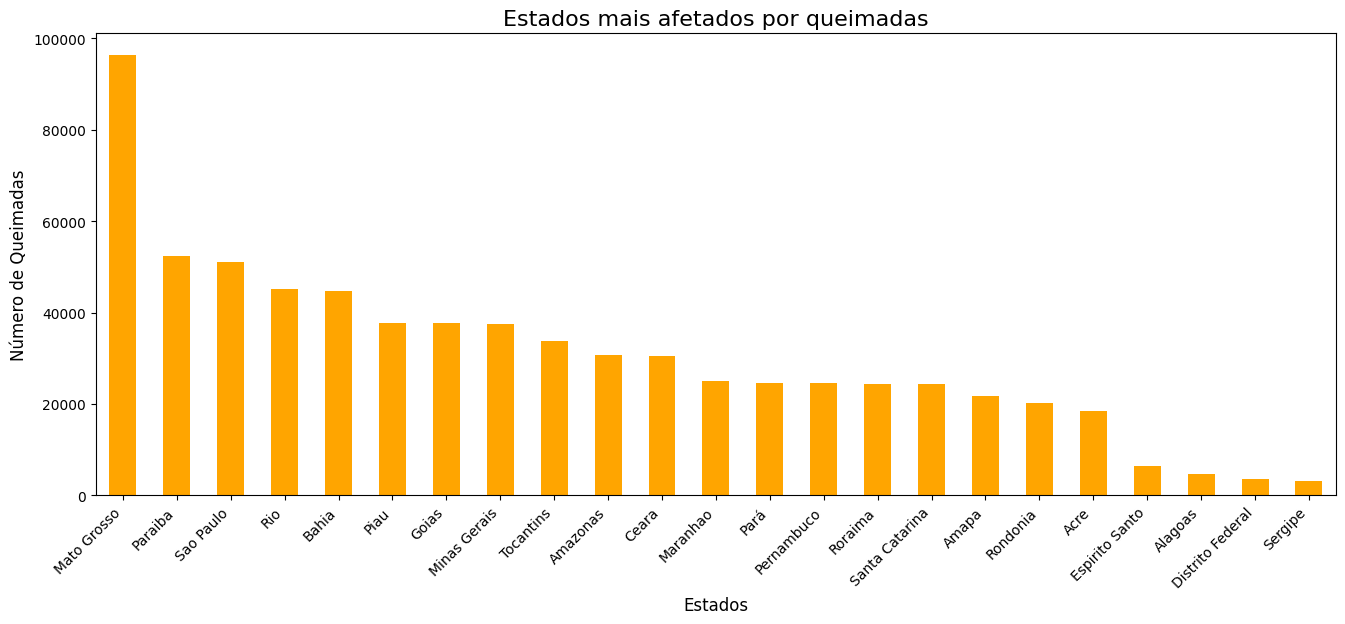

In [4]:
# Agrupando por estado e somando o número de queimadas
queimadas_por_estado = df.groupby('state')['number'].sum().sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(16,6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
queimadas_por_estado.plot(kind='bar', color='orange')

# Título e rótulos do gráfico
plt.title('Estados mais afetados por queimadas', fontsize=16)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Número de Queimadas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()


<H2>De acordo o gráfico, os Estados mais afetados pelas queimadas, nos ultimos 24 anos, foram Mato Grosso, Paraíba, São Paulo, Rio e Bahia.</H2>

<h2>Qual é o padrão de sazonalidade dos incêndios florestais? Existe um aumento nos meses de seca (como junho a setembro)?</h2>

In [75]:
# Criando um array com os meses de seca no Brasil
meses_de_seca = ['Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro']

In [124]:
#Buscar dados dos meses de seca dentro do dataframe
semanas_secas = df[df['month'].isin(meses_de_seca)]

In [122]:
incendios_meses_de_seca = semanas_secas[semanas_secas['number'] > 50]

In [125]:
#Buscar dados dos meses de chuva dentro do dataframe
mesesChuvaBrasil = ["Dezembro", "Janeiro", "Fevereiro", "Março", "Abril"]
meses_de_chuva = df[df['month'].isin(mesesChuvaBrasil)]

In [123]:
incendios_meses_de_chuva = meses_de_chuva[meses_de_chuva['number'] > 50]

<h2>Observando os dados dos meses de chuva e seca separadamente</h2>

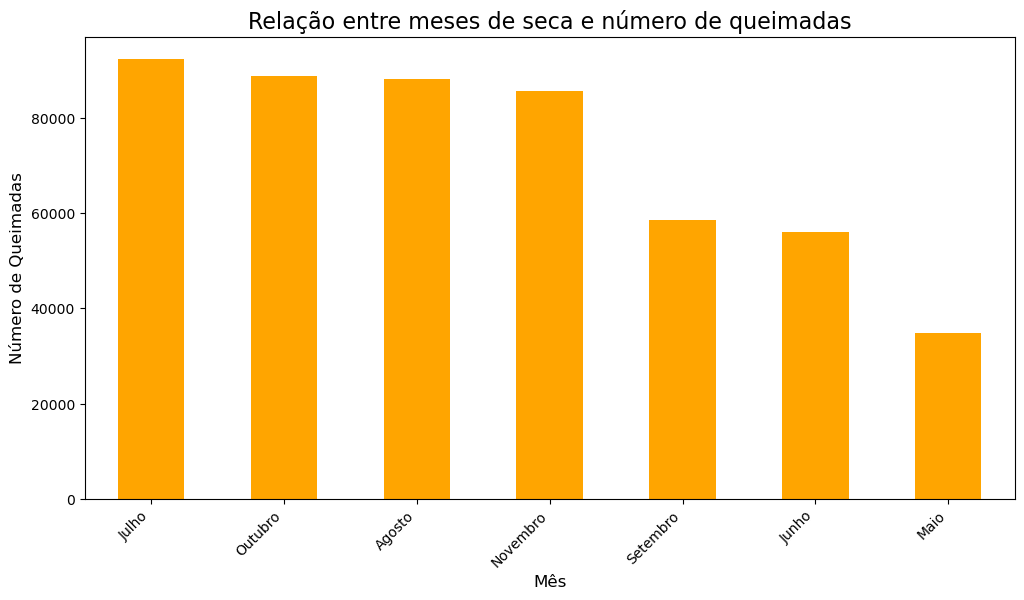

In [130]:
# Agrupando por estado e somando o número de queimadas
queimadas_por_periodo_seco = semanas_secas.groupby(df['month'], observed=True)['number'].sum().sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(12,6))
queimadas_por_periodo_seco.plot(kind = 'bar', color='orange')


# Título e rótulos do gráfico
plt.title('Relação entre meses de seca e número de queimadas', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Queimadas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

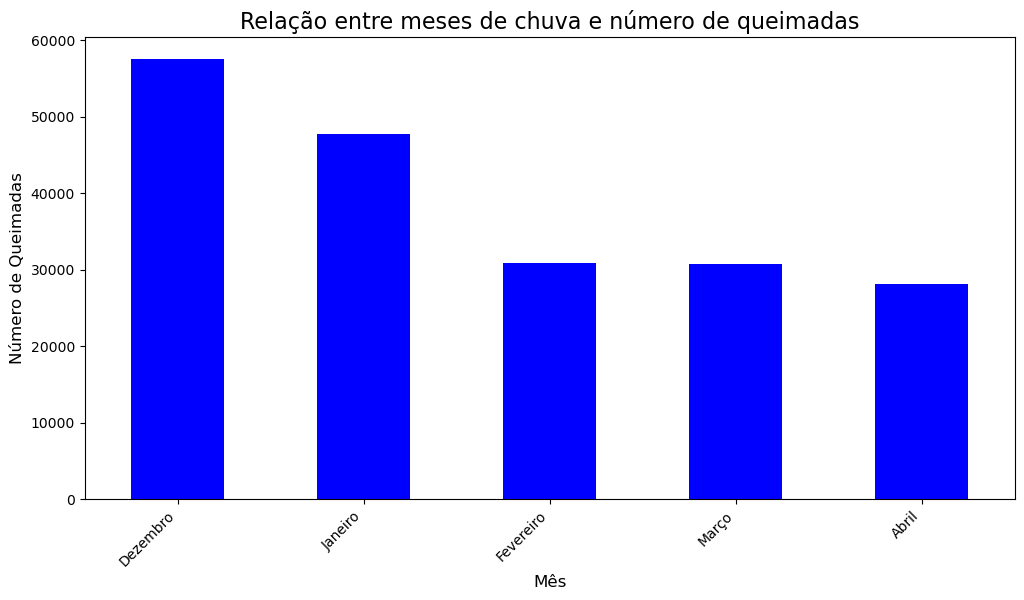

In [131]:
# Agrupando por estado e somando o número de queimadas
queimadas_por_periodo_chuvoso = meses_de_chuva.groupby(df['month'], observed=True)['number'].sum().sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(12,6))
queimadas_por_periodo_chuvoso.plot(kind = 'bar', color='blue')


# Título e rótulos do gráfico
plt.title('Relação entre meses de chuva e número de queimadas', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Queimadas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

<h2>Observando os dados de chuva e seca juntos</h2>

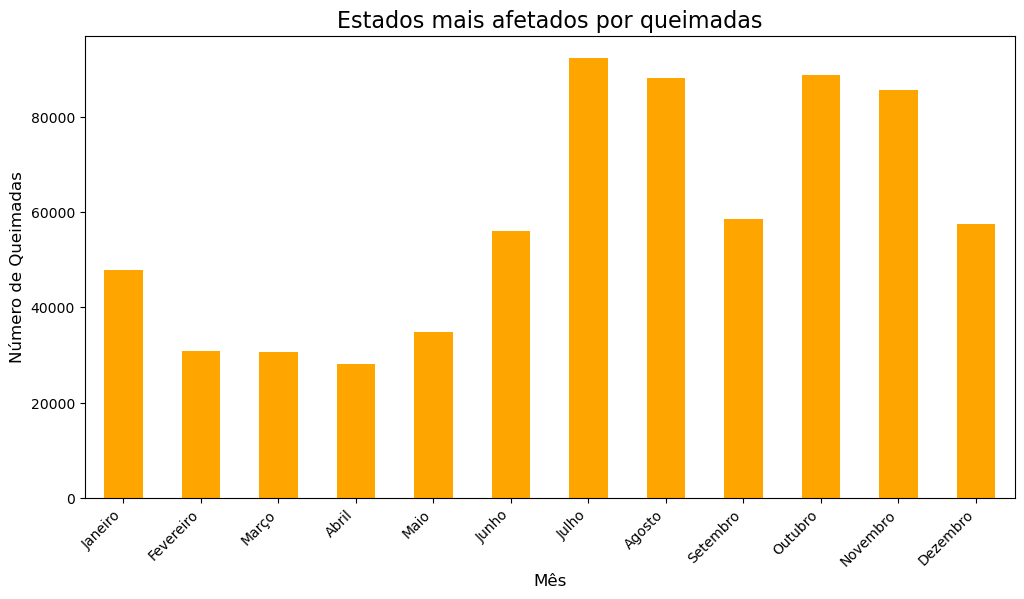

In [121]:
# Definindo a ordem dos meses em português
ordem_dos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Transformando a coluna 'month' em uma categoria com a ordem correta
df['month'] = pd.Categorical(df['month'], categories=ordem_dos_meses, ordered=True)

# Agrupando por estado e somando o número de queimadas
queimadas_por_estado = df.groupby('month', observed=True)['number'].sum().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(12,6))
queimadas_por_estado.plot(kind='bar', color='orange')

# Título e rótulos do gráfico
plt.title('Estados mais afetados por queimadas', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Queimadas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

<h1>Qual é o padrão de sazonalidade dos incêndios florestais? Existe um aumento nos meses de seca (como junho a setembro)?</h1>

<h2>Ao análisar os gráficos de forma separada e, posteriormente, agrupa-los em um único gráfico, tornou-se possível chegar a conclusão de que nos meses de seca(Junho a Setembro), ocorre um grande aumento nos focos de incêndio em todo o Brasil. Além dos gráficos mostrados, temos, a seguir, algumas explicações que criam o embasamento dessa afirmação:</h2>

# Aumento dos Focos de Incêndio no Brasil Durante os Meses de Seca

O aumento dos focos de incêndio no Brasil, especialmente nos meses de seca (de junho a setembro), é influenciado por diversos fatores climáticos, ambientais e humanos. Aqui estão as principais razões para esse aumento:

## 1. Condições Climáticas Desfavoráveis
Durante os meses de seca, várias regiões do Brasil, especialmente no Cerrado, Amazônia e Pantanal, enfrentam uma combinação de fatores climáticos que favorecem o surgimento de incêndios:
- **Baixa umidade relativa do ar**: A umidade do ar reduzida facilita a combustão da vegetação seca, criando um ambiente propício para a propagação de incêndios.
- **Altas temperaturas**: O aumento da temperatura nos meses de inverno (seca) intensifica a secagem da vegetação e a possibilidade de ignição, o que acelera a disseminação do fogo.
- **Ausência de chuvas**: A falta de chuvas deixa a vegetação seca, aumentando a quantidade de material inflamável no solo.

## 2. Vegetação Altamente Inflamável
- **Biomas como o Cerrado e o Pantanal** possuem vegetação adaptada a períodos de seca, com gramíneas e arbustos que se tornam altamente inflamáveis. Durante o inverno seco, a vegetação acumula biomassa seca, que atua como combustível para os incêndios.

## 3. Ação Humana
A influência humana é um dos principais fatores para o aumento dos incêndios:
- **Queimadas para fins agropecuários**: Práticas tradicionais de limpeza de pasto e preparo de terra para plantio, conhecidas como queimadas, são comuns. Muitas vezes, esses incêndios fogem do controle e se alastram para áreas florestais.
- **Desmatamento ilegal**: Em várias regiões, especialmente na Amazônia, desmatadores ilegais usam o fogo para limpar áreas de floresta derrubada. A prática é facilitada pelo tempo seco, que ajuda o fogo a se espalhar rapidamente.
- **Incêndios criminosos**: Há também registros de incêndios provocados intencionalmente para ocupação de terras, expansão de áreas de pastagem ou conflitos de interesse.

## 4. Fragilidade na Fiscalização e Combate aos Incêndios
- **Dificuldades no combate**: O Brasil, com sua vasta extensão territorial e biomas isolados, enfrenta dificuldades logísticas e de recursos para controlar incêndios florestais de grandes proporções, principalmente em áreas remotas como a Amazônia.
- **Fiscalização insuficiente**: Em muitos casos, a fiscalização de desmatamentos e queimadas ilegais é insuficiente, o que favorece a impunidade e a continuidade dessas práticas nocivas.

## 5. Mudanças Climáticas Globais
- **Aquecimento global**: As mudanças climáticas têm intensificado padrões climáticos extremos, incluindo secas mais prolongadas e temperaturas mais elevadas, o que aumenta a vulnerabilidade a incêndios.
- **Alteração nos ciclos naturais de chuva**: O aquecimento global pode estar modificando o ciclo de chuvas, prolongando as estações secas e exacerbando as condições para incêndios.

## Conclusão
Nos meses de seca (de junho a setembro), as condições naturais, somadas à ação humana e à dificuldade de controle, criam um cenário propício para o aumento dos focos de incêndio em todo o Brasil. As queimadas descontroladas durante esse período são um desafio ambiental significativo, com impactos que se estendem para a biodiversidade, saúde pública e economia, além de contribuírem para o aquecimento global devido às emissões de gases de efeito estufa.


<h1>Houve um aumento ou diminuição no número de incêndios ao longo dos anos no Brasil?</h1>

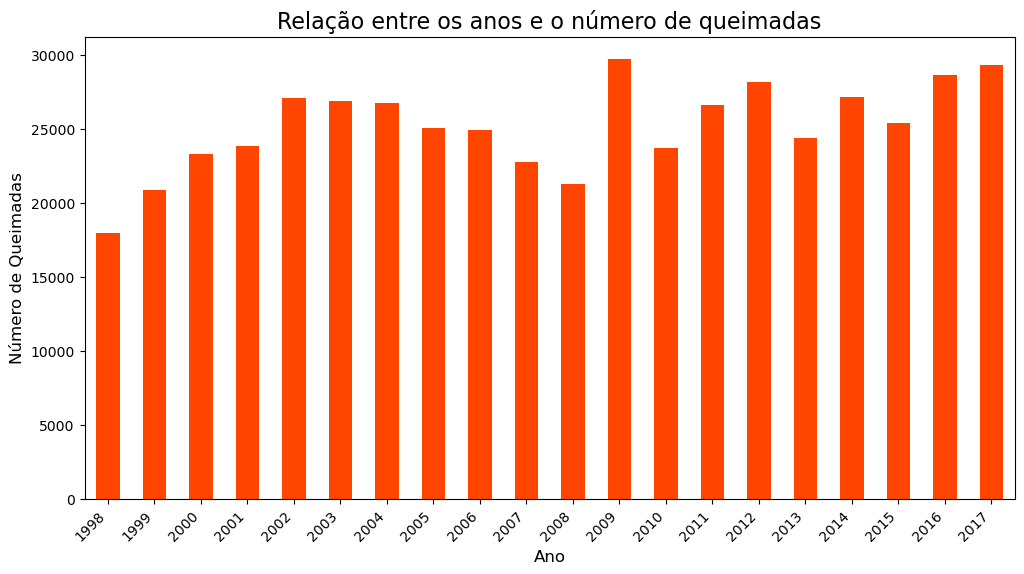

In [141]:
# Agrupando por estado e somando o número de queimadas
queimadas_por_periodo_seco = semanas_secas.groupby(df['year'], observed=True)['number'].sum().sort_index(ascending=True)

# Plotando o gráfico de barras
plt.figure(figsize=(12,6))
queimadas_por_periodo_seco.plot(kind = 'bar', color='#FF4500')


# Título e rótulos do gráfico
plt.title('Relação entre os anos e o número de queimadas', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Queimadas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

# Aumento do Número de Queimadas no Brasil (1988 - 2017)

Entre 1988 e 2017, o Brasil vivenciou um aumento expressivo no número de focos de queimadas, com picos que coincidem com eventos climáticos extremos e intensificação da ação humana sobre áreas florestais. Esse período abrange diferentes fases de políticas ambientais, avanços tecnológicos para monitoramento e, ao mesmo tempo, desafios crescentes com o desmatamento e o uso inadequado do fogo para práticas agropecuárias.

## 1. **Causas Principais do Aumento de Queimadas**
Durante esse intervalo de quase três décadas, diversos fatores contribuíram para o aumento significativo de focos de incêndio no Brasil:

- **Expansão agrícola**: Com a crescente demanda por terras para agricultura e pecuária, a técnica de queimadas se manteve como uma prática comum para "limpeza" de terrenos. Esse método, no entanto, frequentemente sai de controle, espalhando o fogo para florestas próximas.
  
- **Desmatamento da Amazônia**: A maior floresta tropical do mundo foi um dos principais focos de queimadas, devido ao desmatamento desenfreado, especialmente para a criação de pastagens. O ciclo de queimadas intensifica a degradação ambiental, deixando a floresta mais vulnerável a incêndios futuros.

- **Clima e sazonalidade**: O período de seca entre junho e setembro, agravado por mudanças climáticas, resulta em condições ideais para a propagação do fogo. Com a vegetação seca, um simples foco pode se transformar em um incêndio de grandes proporções.

## 2. **Análise do Período**
### Focos de Queimadas por Ano (1988 - 2017)

Os dados do Instituto Nacional de Pesquisas Espaciais (INPE) indicam que, em média, foram detectados **150 mil focos de incêndio por ano** entre 1988 e 2017. Contudo, houve oscilações significativas:

- **Década de 1990**: A década de 1990 marcou uma aceleração no número de queimadas, com picos particularmente altos em 1998, atribuídos ao fenômeno El Niño, que provocou uma seca severa.
  
- **2000 a 2010**: O início dos anos 2000 apresentou alguns dos maiores números de focos de queimadas já registrados. Embora políticas ambientais e a criação de áreas de conservação tenham sido fortalecidas no governo, a fiscalização ainda era insuficiente para conter a pressão por desmatamento e expansão agrícola.

- **2010 a 2017**: A partir de 2010, notou-se uma leve diminuição no número total de focos de queimadas, atribuída ao aumento da fiscalização e ao monitoramento mais rigoroso via satélites. Contudo, eventos climáticos e mudanças na legislação ambiental em anos recentes reverteram a tendência de queda.

# Por que os anos de 2009 e 2017 foram os piores em termos de queimadas no Brasil?

Tanto 2009 quanto 2017 foram anos críticos para as queimadas no Brasil, devido a uma combinação de fatores climáticos e socioeconômicos que criaram condições extremamente favoráveis para o aumento dos incêndios florestais.

## 1. **Ano de 2009**

### 1.1. **Clima Seco e Fenômeno El Niño**
- **El Niño**: Em 2009, o fenômeno El Niño esteve presente, causando o aquecimento anômalo das águas do Oceano Pacífico. Isso resultou em menos chuvas durante a estação seca em várias partes do Brasil, especialmente na Amazônia, tornando as florestas mais suscetíveis a incêndios.
  
- **Seca Prolongada**: A falta de umidade provocada pelo El Niño deixou a vegetação extremamente seca, aumentando o risco e a gravidade dos incêndios.

### 1.2. **Expansão Agrícola e Desmatamento**
- **Desmatamento em Alta**: A pressão para desmatar terras para a agricultura e a pecuária foi um fator significativo. Em muitos casos, as queimadas são usadas para limpar terras após o desmatamento, o que contribuiu para o aumento do número de focos de incêndio.

- **Uso Descontrolado de Fogo**: A prática de queimadas para manejo agrícola se tornou difícil de controlar, exacerbada pela vegetação seca e os fortes ventos, causando grandes incêndios fora de controle.

### 1.3. **Falta de Políticas de Controle**
- **Fiscalização Insuficiente**: A falta de fiscalização e controle rigoroso sobre o uso de queimadas, especialmente em áreas críticas de desmatamento, contribuiu para o crescimento do número de incêndios.

## 2. **Ano de 2017**

### 2.1. **Severas Condições Climáticas**
- **Clima Extremo**: 2017 foi marcado por secas severas em várias regiões do Brasil, especialmente no Cerrado e na Amazônia. A escassez de chuvas tornou as áreas florestais extremamente inflamáveis, criando um ambiente ideal para a propagação de incêndios.

- **Alta Temperatura e Baixa Umidade**: A combinação de altas temperaturas e baixa umidade aumentou ainda mais a vulnerabilidade das florestas a incêndios.

### 2.2. **Pressão Agrícola e Queimadas Intencionais**
- **Aumento do Desmatamento**: Apesar das tentativas de controle, o desmatamento continuou em níveis elevados. As áreas desmatadas, muitas vezes, são queimadas para preparar o solo para pastagens e agricultura, contribuindo diretamente para o aumento dos incêndios.

- **Queimadas Agrícolas**: O uso de fogo como ferramenta agrícola continuou a ser uma prática comum, muitas vezes resultando em incêndios descontrolados que atingiram áreas protegidas e florestas primárias.

### 2.3. **Retrocesso nas Políticas Ambientais**
- **Relaxamento das Leis Ambientais**: Em 2017, houve um enfraquecimento das políticas de proteção ambiental e da fiscalização, o que pode ter contribuído para o aumento do número de queimadas. A redução na capacidade de monitoramento e nas sanções para desmatamento ilegal teve um impacto negativo no controle dos incêndios.

## Conclusão
Os anos de 2009 e 2017 foram devastadores para as florestas brasileiras, com um aumento expressivo no número de queimadas. Ambos os anos foram marcados por condições climáticas extremas, agravadas por práticas humanas de desmatamento e queimadas agrícolas descontroladas. A falta de políticas de controle efetivas e o retrocesso nas políticas ambientais contribuíram significativamente para o agravamento dos incêndios, resultando em graves danos ao meio ambiente.
s anos seguintes.
